In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def prep_financial_data_for_plotting(path2csv):
    """
    Reformats a .csv file DOWNLOADED FROM
    YAHOO FINANCE into the format for 
    plotting
    """
    data = pd.read_csv(path2csv)[['Date', 'Close']]
    data['Date'] = pd.to_datetime(data['Date'])
    indexed_data = data.set_index('Date')
    ts = indexed_data.Close
    return ts

def get_ticker_name(filename):
    """
    Gets ticker from csv filename
    ASSUMES: filename is {ticker}.csv
    """
    return filename.split('.')[0]


In [3]:
path2data = '/Users/carlosolivares/data-visualization/data/portfolio-data'
files = os.listdir(path2data)
print([get_ticker_name(file) for file in files])

#fzrox = prep_financial_data_for_plotting(os.path.join(path2data, 'FZROX.csv'))
#fzilx = prep_financial_data_for_plotting(os.path.join(path2data, 'FZILX.csv'))
#sphix = prep_financial_data_for_plotting(os.path.join(path2data, 'FUAMX.csv'))
#qqq = prep_financial_data_for_plotting(os.path.join(path2data, 'QQQ.csv'))

['FUAMX', 'QQQ', 'FZILX', 'VTI', 'FZROX']


In [4]:
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

FUAMX.csv: 1161
QQQ.csv: 1259
FZILX.csv: 958
VTI.csv: 262
FZROX.csv: 957


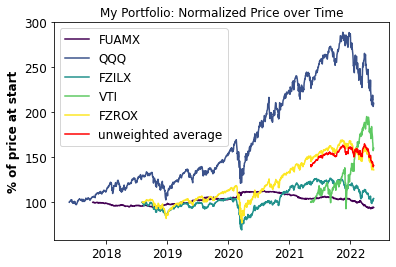

In [5]:
## Now let's generate the plot a bit more programmatically 
#colors = ['green','orange', 'purple', 'black', 'blue']

N = 6
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1.25,N)))
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)

def pad_stock_lifetime(timescale_len, stock_numpy):
    if len(stock_numpy) == timescale_len:
        return stock_numpy
    return np.pad(stock_numpy, (time - stock_numpy.shape[0], 0), constant_values=np.nan)

stonks = []
time = 0
timescale = None
for i in range(len(files)):
    path2file = os.path.join(path2data, files[i])
    time_series_data = prep_financial_data_for_plotting(path2file)
    print("{}: {}".format(files[i], len(time_series_data)))
    if len(time_series_data) > time:
        time = len(time_series_data)
        timescale = time_series_data.index

for i in range(len(files)):
    ticker = get_ticker_name(files[i])
    path2file = os.path.join(path2data, files[i])
    time_series_data = prep_financial_data_for_plotting(path2file)
    normalized_ts_data = (time_series_data * 100) / time_series_data[0]
    stonks.append(normalized_ts_data.to_numpy()[-262:])
    plt.plot(timescale, pad_stock_lifetime(time, normalized_ts_data), label=ticker)
plt.plot(timescale, pad_stock_lifetime(time, np.average(stonks, axis=0)), color='red', label='unweighted average')
#print(np.average(stonks, axis=0).shape)
#unweighted_average = np.pad(np.average(stonks, axis=0), ((1259-262), 0), constant_values=np.NaN)
#print(unweighted_average.shape)
#rint(unweighted_average[:5])
#plt.plot(np.pad(np.average(stonks, axis=0), (1000, 0), constant_values=np.NaN), color='red', label="unweighted average")
plt.title("My Portfolio: Normalized Price over Time")
plt.ylabel("% of price at start")
plt.legend(loc="best")


#plt.plot((fzrox * 100)/fzrox[0], color='green', label='fzrox')
#plt.plot((fzilx * 100)/fzilx[0], color='orange', label='fzilx')
#plt.plot((sphix * 100)/sphix[0], color='purple', label='fuamx')
#plt.plot((qqq * 100)/qqq[0], color='black', label='qqq')

FUAMX.csv: 1161
QQQ.csv: 1259
FZILX.csv: 958
VTI.csv: 262
FZROX.csv: 957


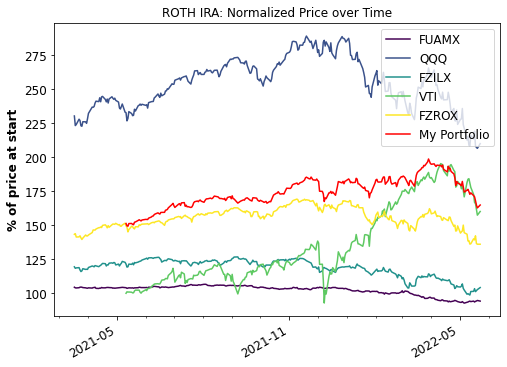

In [15]:
stonks = []
time = 0
timescale = None

half_year_locator = mdates.MonthLocator(interval=6)
monthly_locator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%Y-%m")
for i in range(len(files)):
    path2file = os.path.join(path2data, files[i])
    time_series_data = prep_financial_data_for_plotting(path2file)
    print("{}: {}".format(files[i], len(time_series_data)))
    if len(time_series_data) > time:
        time = len(time_series_data)
        timescale = time_series_data.index
fig = plt.figure(figsize=(8,6))
for i in range(len(files)):
    ticker = get_ticker_name(files[i])
    path2file = os.path.join(path2data, files[i])
    time_series_data = prep_financial_data_for_plotting(path2file)
    normalized_ts_data = (time_series_data * 100) / time_series_data[0]
    stonks.append(normalized_ts_data.to_numpy()[-262:])
    plt.plot(timescale[-300:], pad_stock_lifetime(time, normalized_ts_data)[-300:], label=ticker)

plt.plot(
    timescale[-300:],
    pad_stock_lifetime(time, np.average(
        stonks,
        axis=0,
        weights=[.0426, .2754, .026, .3766, .2096]
    )
                      )[-300:],
    color='red', 
    label='My Portfolio'
)
plt.gca().xaxis.set_major_locator(half_year_locator)
plt.gca().xaxis.set_minor_locator(monthly_locator)
plt.gca().xaxis.set_major_formatter(year_month_formatter)
plt.title("ROTH IRA: Normalized Price over Time")
plt.ylabel("% of price at start")
plt.legend(loc="best")
fig.autofmt_xdate()

Now I have learned about plt.gca() and how to cycle through colors with a prop cycle. Now I think it might be better to label the lines instead of making a legend. Also, add variation based on line style and not just color. 

After that, make the fonts bigger or something. Also make sure to take notes/write questions about having a timeseries as the x axis and plotting timeseries data in the first place